<a href="https://colab.research.google.com/github/RodrigoMarenda/Analise_de_Dados/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Rodrigo Belo Marenda

**Matrícula:** 4052024002404

**Dataset:** [Wine Quality](https://www.kaggle.com/datasets/sahideseker/wine-quality-classification)


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">Classificação da Qualidade de Vinhos</p>


[**Classificação da Qualidade de Vinhos**]

(https://github.com/RodrigoMarenda/Analise_de_Dados/blob/main/wine_image.jpeg)

(https://github.com/RodrigoMarenda/Sports_Predictions/blob/main/Imagens/wine_image.jpeg?raw=true)


# **Introdução**

### **Definição do Problema:**

O conjunto de dados Wine Quality é um conjunto de dados multivariado que consiste na avaliação de vinhos produzidos mundialmente. O objetivo principal é classificar o Rotuno do Vinho com com base em quatro características : acidez, residuo de açucar,	nivel alcolico	e densidade.


**Tipo de Problema**

**classificação supervisionada**  (Baixa, Média ou Alta Qualidade).


  - **Premissa**: Dados históricos dos jogos disputados, com variaveis que possam ser correlacionadas para determinar uma tendencia de resultado.

  - **Hipótese**: Um modelo de machine learning treinado com dados históricos, para identificar padrões que ajudem a prever o resultado das partidas.

  - **Variáveis**:

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?

- Existe uma correlação entre nacidez e nivel alcolico ?

- A espécie Iris setosa é mais facilmente separável das outras duas espécies?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (comprimento e largura da sépala, comprimento e largura da pétala), o objetivo é prever a qual das três classes (espécies de Íris) uma determinada flor pertence.

## Seleção de Dados

O dataset Iris é um conjunto de dados amplamente disponível e frequentemente incluído em bibliotecas de aprendizado de máquina, como *scikit-learn* no Python. Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

## Atributos do Dataset

O dataset Iris contém 150 amostras, com 50 amostras de cada uma das três espécies de Íris. Possui cinco atributos:

- ***sepal length*** (comprimento da sépala em cm)
- ***sepal width*** (largura da sépala em cm)
- ***petal length*** (comprimento da pétala em cm)
- ***petal width*** (largura da pétala em cm)
- ***species*** (espécie de Íris: setosa, versicolor, virginica)

******************************************

## **Estrutura do projeto:**

[**1. Importação das Bibliotecas:**](#1)

[**2. Carga dos Dados:**](#2)

[**3. Analise de dados:**](#3)

[**4. Pré-processamento de dados:**](#4)

[**5. Interpretação e Geração de Insights:**](#5)

[**6. Visualização Final e Comunicação:**](#6)

[**7. Conclusão:**](#7)

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">1. Importação das Bibliotecas</p>

# Step 01: Importação das Bibliotecas

Nessa etapa estamos importanto todas as blibliotecas que serão utilizadas nesse algoritimo

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">2. Carga dos Dados</p>

# Step 01: Carga de Dados

Nessa etapa estamos realizando a carga dos dados, que estão armazendos em um arquivo do tipo csv (Comma-Separated Values). Esse dataset foi obtido no Site Kaggle: https://www.kaggle.com/datasets. Foram coletados dados de rotulos de vinhos, com o objetivo de realização de uma classificação dos Rotulos de acordo com as sua variaveis dipostas no dataset.

In [72]:
#--------------------------------------------------------#
# Informa a URL de importação do dataset                 #
#--------------------------------------------------------#

url ="https://raw.githubusercontent.com/RodrigoMarenda/Sports_Predictions/refs/heads/main/data/winemag-data_first25k.csv"


# Lê o arquivo
df = pd.read_csv(url, delimiter=';', low_memory=False)



# Exibir as primeiras linhas do DataFrame
df.head()



,id,country,description,designation,points,price,province,region_1,region_2,variety,winery,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,0.0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96.0,2350.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,"9,3","6,4","13,6",10005,high
1,1.0,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96.0,1100.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,"11,2",2,14,"0,9912",medium
2,2.0,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96.0,900.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,"11,6","0,9","8,2","0,9935",low
3,3.0,US,"This spent 20 months in 30% new French oak, an...",Reserve,96.0,650.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,"12,9","6,6","12,7",10002,low
4,4.0,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95.0,660.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,"13,9","13,8","10,4","0,9942",medium


In [73]:
# Verifica o tamanho do dataset , total de linhas e colunas.
df.shape
print(f"O Dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

O Dataset tem 150931 linhas e 16 colunas.


In [74]:
# Verifica a estrutura do dataset, datatypes das colunas
df.dtypes

,0
id,float64
country,object
description,object
designation,object
points,float64
price,float64
province,object
region_1,object
region_2,object
variety,object


In [75]:
# Conversão de colunas numéricas que estão como objeto
numeric_object_cols = ['fixed_acidity', 'residual_sugar', 'alcohol', 'density']

# Substitui vírgula por ponto e converte para float
for col in numeric_object_cols:
    df[col] = df[col].astype(str).str.replace(',', '.').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

# remove a coluna de controle ID , para que nao seja considerada como dato de negócio
df = df.drop(columns='id')

#Mostra o resumo das informações estruturais do DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150931 entries, 0 to 150930
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         24999 non-null  object 
 1   description     25001 non-null  object 
 2   designation     17179 non-null  object 
 3   points          24279 non-null  float64
 4   price           22188 non-null  float64
 5   province        24277 non-null  object 
 6   region_1        20509 non-null  object 
 7   region_2        9411 non-null   object 
 8   variety         24279 non-null  object 
 9   winery          24279 non-null  object 
 10  fixed_acidity   25001 non-null  float64
 11  residual_sugar  25001 non-null  float64
 12  alcohol         25001 non-null  float64
 13  density         25001 non-null  float64
 14  quality_label   25001 non-null  object 
dtypes: float64(6), object(9)
memory usage: 17.3+ MB
None


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">3. Analise de Dados:</p>

Nessa etapa de Análise de Dados, também chamada de análise exploratória de dados ou Exploratory Data Analysis – EDA vamos entender, resumir e visualizar os dados antes da modelagem ou tomada de decisão.

# Step 01: Exploração Inicial - Dimensões do Dataset

In [76]:
print("Informações do Dataframe:")

linhas, colunas = df.shape
print(f"🔢 Total de linhas: {linhas}")
print(f"🧱 Total de colunas: {colunas}")


Informações do Dataframe:
🔢 Total de linhas: 150931
🧱 Total de colunas: 15


# Step 02: Exploração Inicial - Informações do DataSet

In [77]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150931 entries, 0 to 150930
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         24999 non-null  object 
 1   description     25001 non-null  object 
 2   designation     17179 non-null  object 
 3   points          24279 non-null  float64
 4   price           22188 non-null  float64
 5   province        24277 non-null  object 
 6   region_1        20509 non-null  object 
 7   region_2        9411 non-null   object 
 8   variety         24279 non-null  object 
 9   winery          24279 non-null  object 
 10  fixed_acidity   25001 non-null  float64
 11  residual_sugar  25001 non-null  float64
 12  alcohol         25001 non-null  float64
 13  density         25001 non-null  float64
 14  quality_label   25001 non-null  object 
dtypes: float64(6), object(9)
memory usage: 17.3+ MB
None


# Step 03: Exploração Inicial - Amostra de Dados

In [78]:
print("="*50)
print("Amostra das 10 Primeiras linhas do DataFrame")
print("="*50)
df.head(10)




Amostra das 10 Primeiras linhas do DataFrame


,country,description,designation,points,price,province,region_1,region_2,variety,winery,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96.0,2350.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,9.3,6.4,13.6,10005.0000,high
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96.0,1100.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,11.2,2.0,14.0,0.9912,medium
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96.0,900.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,11.6,0.9,8.2,0.9935,low
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96.0,650.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,12.9,6.6,12.7,10002.0000,low
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95.0,660.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,13.9,13.8,10.4,0.9942,medium
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95.0,730.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,12.5,0.7,10.5,0.9933,low
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95.0,650.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,4.3,9.0,13.1,0.9909,high
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95.0,1100.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,15.0,1.7,12.9,0.9917,high
8,US,This re-named vineyard was formerly bottled as...,Silice,95.0,650.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,12.3,6.6,13.2,0.9936,medium
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95.0,600.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,12.2,14.4,9.9,10021.0000,medium


In [79]:
print("="*50)
print("Amostra das 10 ultimas linhas do DataFrame")
print("="*50)
df.tail(10)

Amostra das 10 ultimas linhas do DataFrame


,country,description,designation,points,price,province,region_1,region_2,variety,winery,fixed_acidity,residual_sugar,alcohol,density,quality_label
150921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 04: Exploração Inicial - Datatypes do DataSet

In [80]:
print("="*40)
print("📊 Informações sobre o DataFrame")
print("="*40)


print("\n Tipos de dados (dtypes) do dataset: \n")
print(df.dtypes)

📊 Informações sobre o DataFrame

 Tipos de dados (dtypes) do dataset: 

country            object
description        object
designation        object
points            float64
price             float64
province           object
region_1           object
region_2           object
variety            object
winery             object
fixed_acidity     float64
residual_sugar    float64
alcohol           float64
density           float64
quality_label      object
dtype: object


# Step 05: Exploração Inicial - Resumo Estatistico

In [81]:
print("="*40)
print("📊 Resumo Estatistico")
print("="*40)
df.describe()

📊 Resumo Estatistico


,points,price,fixed_acidity,residual_sugar,alcohol,density
count,24279.000000,22188.000000,25001.000000,25001.000000,25001.000000,25001.000000
mean,88.490259,351.604020,10.174265,7.691948,11.040002,3095.600048
std,3.018420,384.759181,3.450971,4.206823,1.759477,4604.346069
min,80.000000,40.000000,4.000000,0.500000,8.000000,0.990000
25%,86.000000,170.000000,7.100000,4.100000,9.500000,0.993900
50%,88.000000,250.000000,10.400000,7.500000,11.000000,0.997400
75%,90.000000,420.000000,13.100000,11.500000,12.600000,10008.000000
max,100.000000,20130.000000,16.000000,15.000000,14.000000,10049.000000


📊 Resumo Estatistico


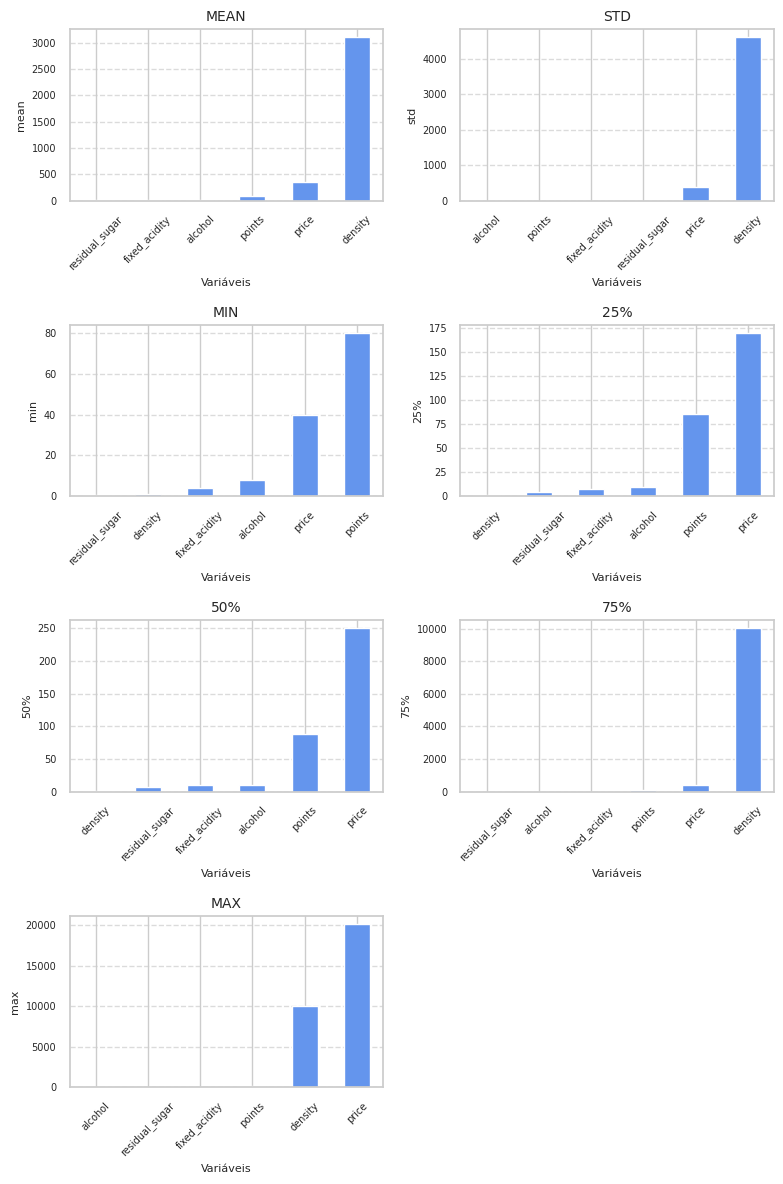

In [82]:
print("="*40)
print("📊 Resumo Estatistico")
print("="*40)

stats = df.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estatisticas = stats.columns.tolist()

# Número de gráficos e layout (2 por linha)
num_graficos = len(estatisticas)
linhas = (num_graficos + 1) // 2  # arredonda pra cima
fig, axs = plt.subplots(linhas, 2, figsize=(8, linhas * 3))  # largura fixa, altura proporcional


axs = axs.flatten()  # facilitar iteração

for i, stat in enumerate(estatisticas):
    stats[stat].sort_values().plot(kind='bar', color='cornflowerblue', ax=axs[i])
    axs[i].set_title(stat.upper(), fontsize=10)
    axs[i].set_ylabel(stat, fontsize=8)
    axs[i].set_xlabel('Variáveis', fontsize=8)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)
    axs[i].tick_params(axis='x', rotation=45, labelsize=7)
    axs[i].tick_params(axis='y', labelsize=7)

# Remover qualquer eixo vazio (se número ímpar)
if num_graficos % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


# Step 06: Exploração Inicial - Distribuição de Classes

📊 Distribuição de Classes


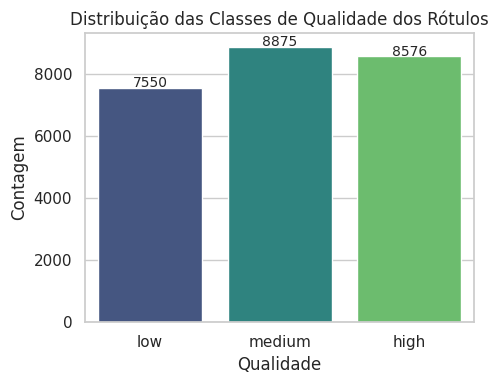

In [83]:
print("="*40)
print("📊 Distribuição de Classes")
print("="*40)

# Agrupamento das classes
class_counts = df['quality_label'].value_counts().reindex(['low', 'medium', 'high'])

# Plot
plt.figure(figsize=(5, 4))

ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

# Título e eixos
plt.title('Distribuição das Classes de Qualidade dos Rótulos')
plt.xlabel('Qualidade')
plt.ylabel('Contagem')

# Adiciona os valores nas barras
for i, v in enumerate(class_counts.values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">4. Visualizações Unimodais:</p>

Nessa etapa vamos ver a distribuição dos dados por meio de Visualizações unimodais,  que são gráficos em que se observa uma única moda, uma única concentração central na distribuição dos valores.

# Step 01: Visualizações Unimodais - Histograma

Nesse step vamos observar por meio de histograma a distribuição de cada atributo do dataset.

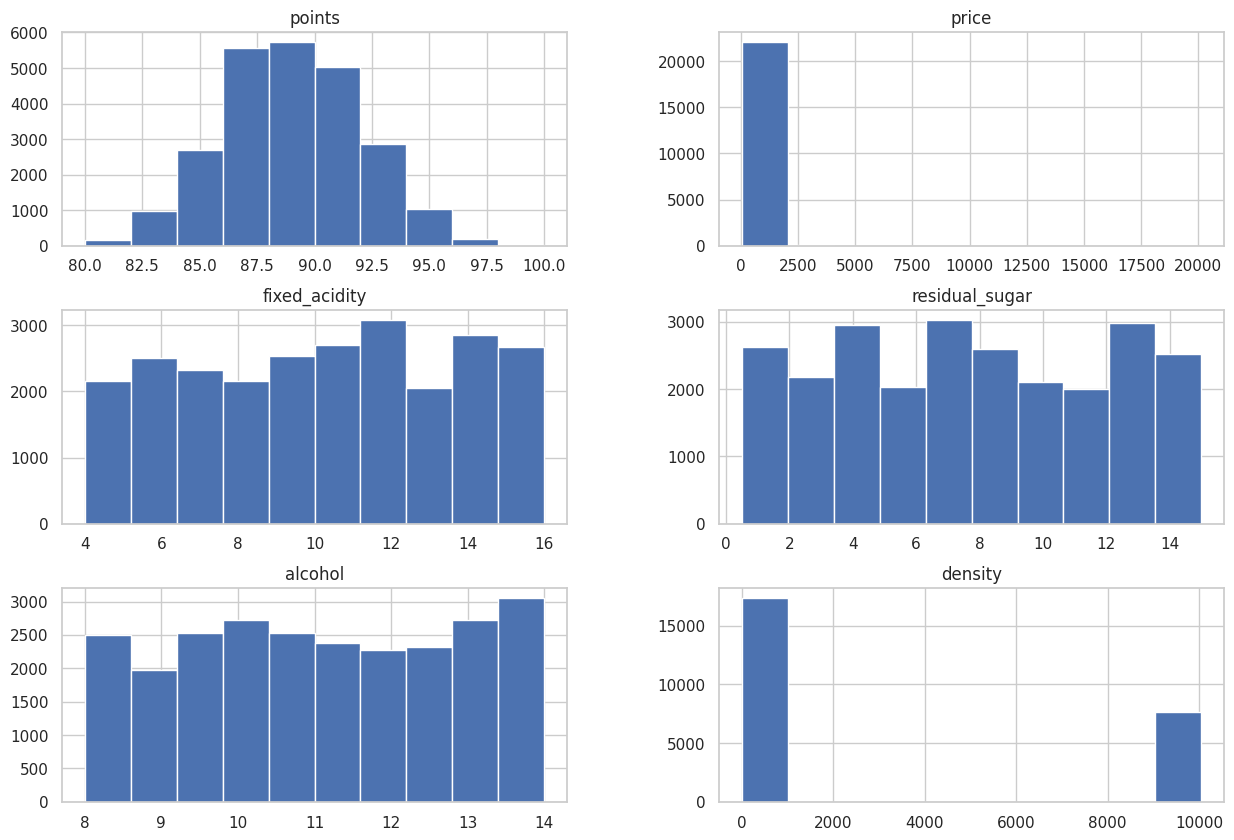

In [84]:
df.hist(figsize = (15,10))
plt.show()

**Conclusão:**

O dado price e density precisam ser verificados e tratados, avaliaremos a remoção ou transformação de outliers.

Os dados points, alcohol, fixed_acidity e residual_sugar parecem estar em condições boas para análise.

# Step 02: Visualizações Unimodais - Boxplot

Nesse step vamos observar por meio de graficos Boxpot a distribuição de cada atributo do dataset.

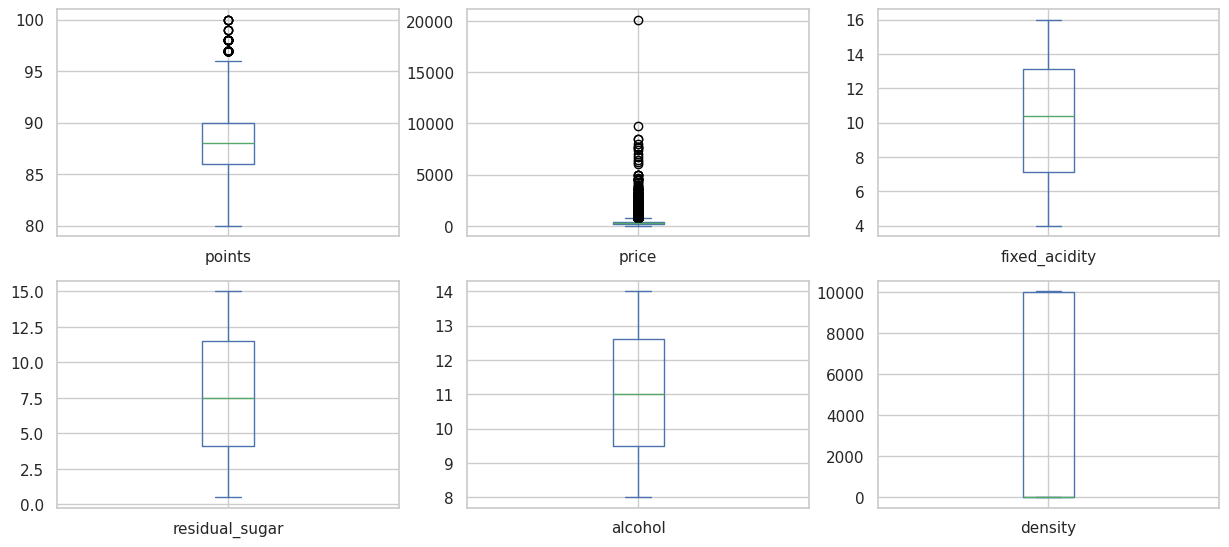

In [85]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

**Conclusão:**

points, fixed_acidity e alcohol apresentam distribuições coerentes e poucos outliers, logo estão adequadas para análise.

residual_sugar apresenta  uma alta variação.

price: apresenta muitos outliers e valores extremamente altos (até 20.000), que podem gerar problemas nas análises.

density: valores incoerentes, chegando a 10.000, pode indicar erros de escala incorreta pode requerer limpeza urgente.

# Step 03: Visualizações Unimodais - Gráfico de Densidade

Nesse step vamos ver os gráficos de densidade, para ver a distribuição probabilística contínua de uma variável. podemos verificar onde os dados estão mais concentrados e como se distribuem ao longo do eixo dos valores.

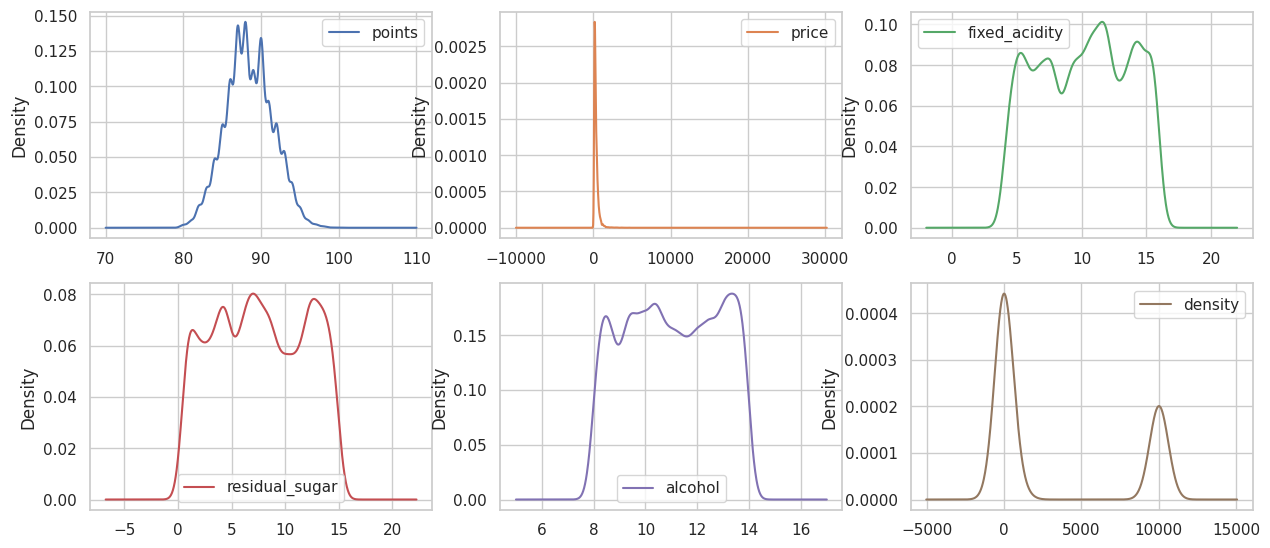

In [86]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

**Conclusão:**

Variável price tem caracteristicas de ser unimodal, embora assimétrica.

As outras variaveis bimodais ou multimodais, a variavel density provavelmente vai precisar de precisa de limpeza.

# Step 06: Visualizações Unimodais - Histograma + KDE

Nesse Step vamos ver atraves do gráfico Histograma + KDE como os dados se distribuem e onde se concentram. Esse tipo de grafico é ideal para Detectar padrões, Avaliar necessidade de transformações e Decidir se vale a pena segmentar os dados.

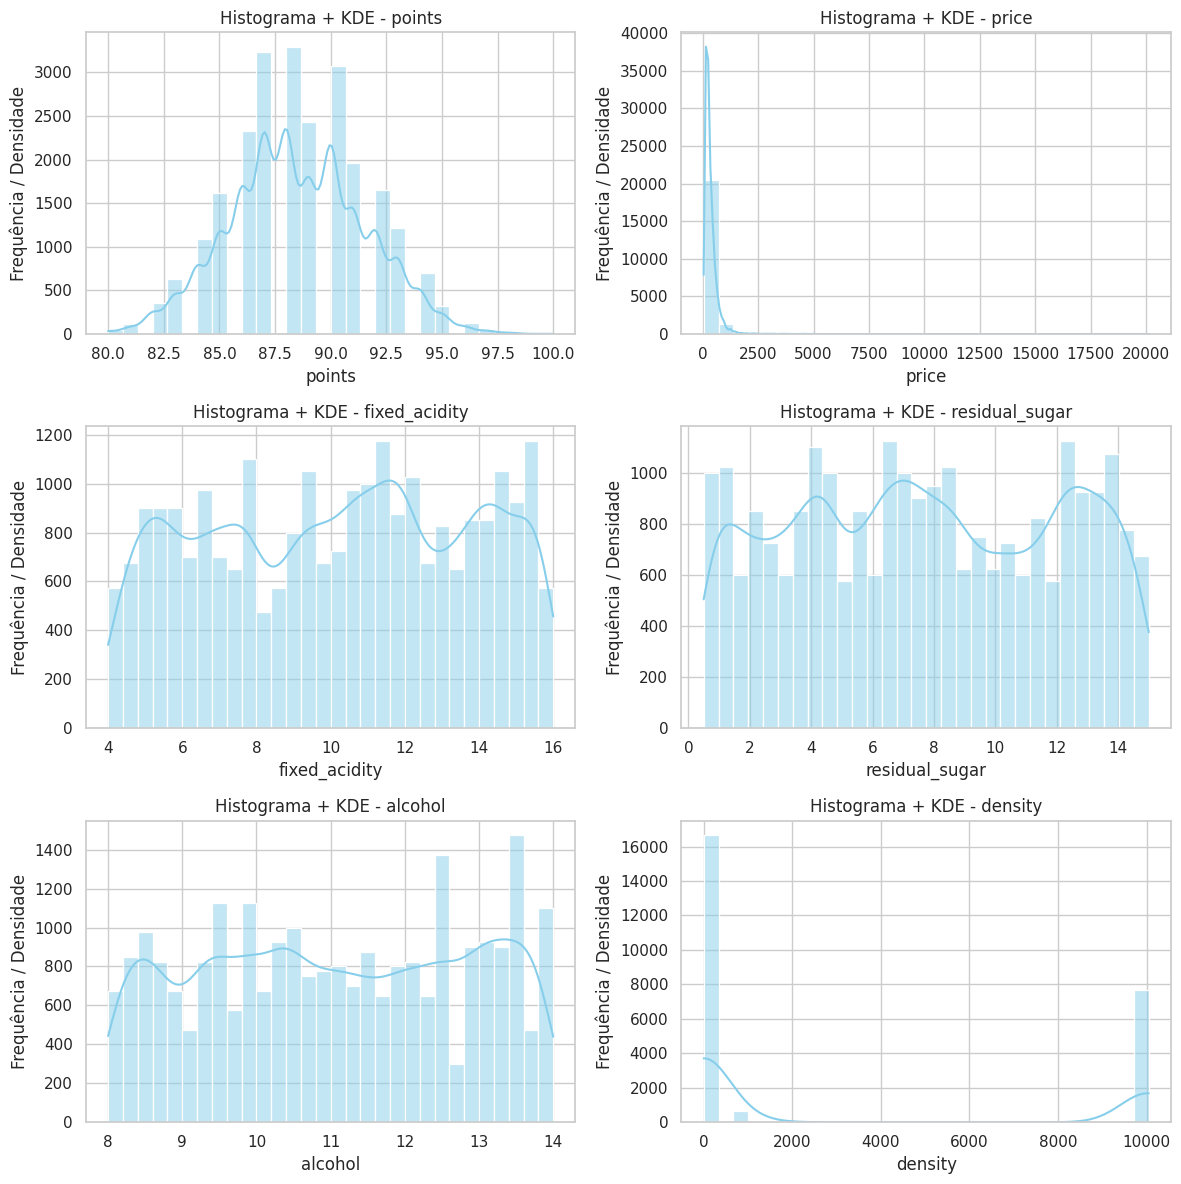

In [89]:
sns.set(style="whitegrid")

# Seleciona colunas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Configura o layout do grid
n_cols = 2  # dois por linha
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Cria a figura com subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

# Loop para gerar cada histograma com KDE
for i, col in enumerate(numeric_cols):
    data = df[col].dropna()
    sns.histplot(data, bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histograma + KDE - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência / Densidade')

# Remove subplots vazios (caso o número de colunas não seja par)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Conclusão:**

Variaveis points e price tem caracteristicas unimodal.

As outras variáveis apresentam multimodalidade, necessidade de segmentação antes da modelagem.

A variavel density requer tratamento nos valores, pois apresenta escala fora de padrão.



<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">4. Visualizações Multimodais:</p>

Nessa etapa será realizado o ajuste do dataset, para considerar somente as colunas que fazem sentido para a analise. Também será feita a limpeza, transformação e o tratamento de dados nulos ou vazios. Faremos a padronização dos dados para melhorar o desempenho do algoritmo.

# 4.1. Visualizações Multimodais - Numérica × Numérica

> # Step 01: Scatter Plot (Dispersão)

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

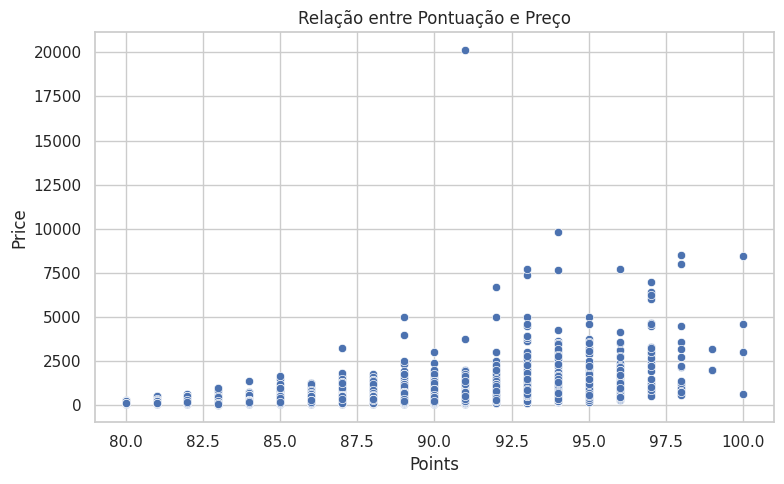

In [90]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='points', y='price')
plt.title('Relação entre Pontuação e Preço')
plt.xlabel('Points')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

> # Step 02: Pairplot (Matriz de Dispersão)

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.



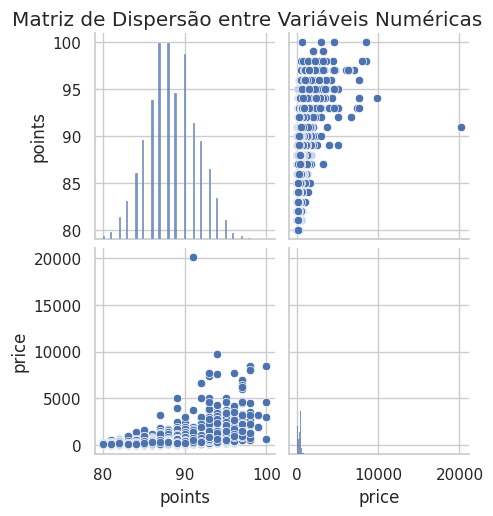

In [91]:
sns.pairplot(df[['points', 'price']].dropna())
plt.suptitle('Matriz de Dispersão entre Variáveis Numéricas', y=1.02)
plt.show()

> # Step 03: Heatmap de Correlação

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

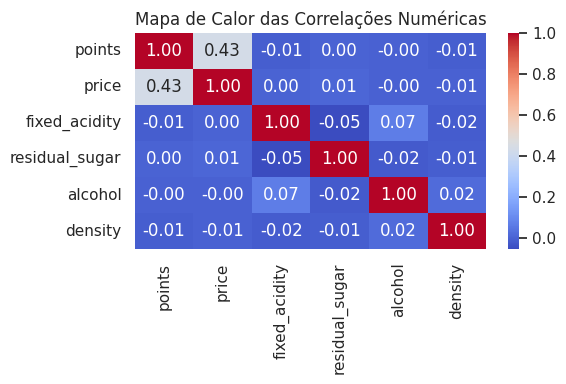

In [92]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor das Correlações Numéricas')
plt.tight_layout()
plt.show()

# 4.2. Visualizações Multimodais - Categórica × Numérica

> # Step 01: Boxplot por Categoria (quality_label)

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

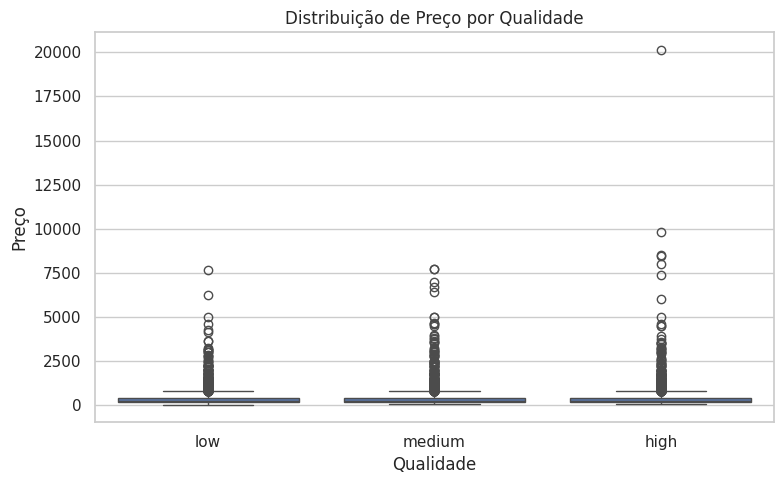

In [93]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='quality_label', y='price', order=['low', 'medium', 'high'])
plt.title('Distribuição de Preço por Qualidade')
plt.xlabel('Qualidade')
plt.ylabel('Preço')
plt.tight_layout()
plt.show()

> # Step 02: Violin Plot

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

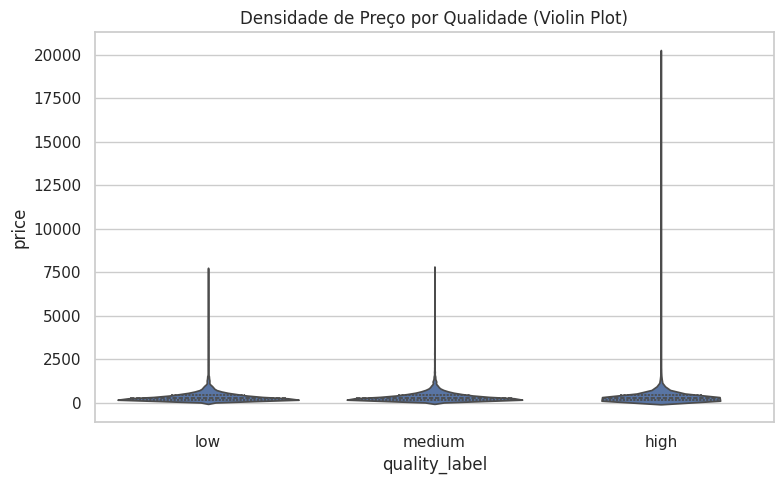

In [94]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='quality_label', y='price', order=['low', 'medium', 'high'], inner='quartile')
plt.title('Densidade de Preço por Qualidade (Violin Plot)')
plt.tight_layout()
plt.show()

> # Step 03: Barplot (média de preço por qualidade)

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

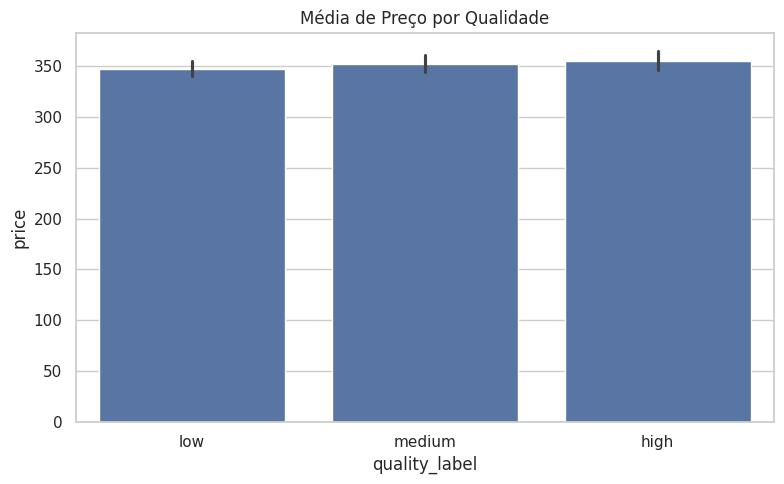

In [95]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='quality_label', y='price', order=['low', 'medium', 'high'], estimator='mean')
plt.title('Média de Preço por Qualidade')
plt.tight_layout()
plt.show()

> # Step 04: Swarm Plot

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

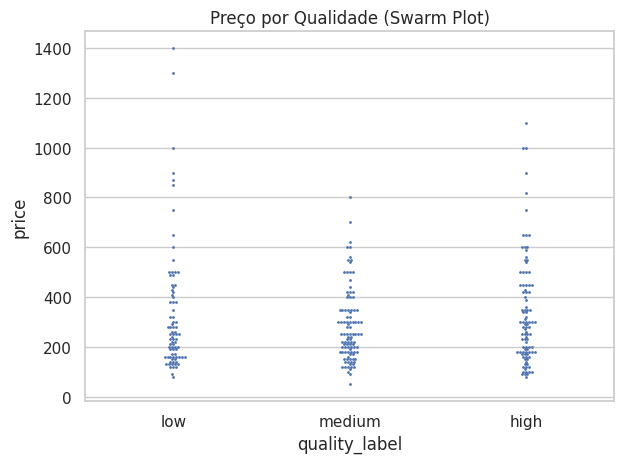

In [96]:
sns.swarmplot(data=df.sample(n=2000, random_state=42), x='quality_label', y='price',
              order=['low', 'medium', 'high'], size=2)
plt.title('Preço por Qualidade (Swarm Plot)')
plt.tight_layout()
plt.show()

# 4.3. Visualizações Multimodais - Categórica × Categórica

> # Step 01: Countplot com hue
O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

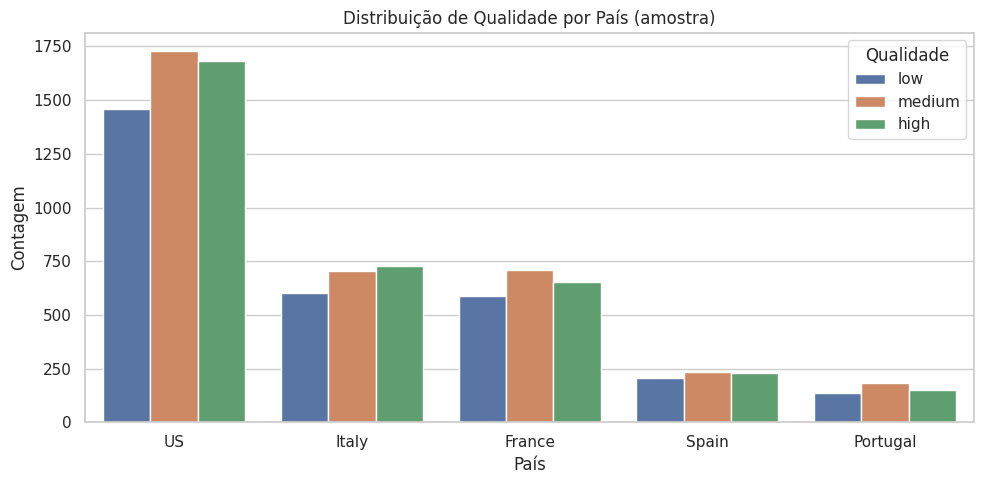

In [97]:
top_paises = df['country'].value_counts().index[:5]
df_top = df[df['country'].isin(top_paises)].sample(n=10000, random_state=42)  # ajustável

plt.figure(figsize=(10, 5))
sns.countplot(data=df_top, x='country', hue='quality_label', order=top_paises,
              hue_order=['low', 'medium', 'high'])
plt.title('Distribuição de Qualidade por País (amostra)')
plt.xlabel('País')
plt.ylabel('Contagem')
plt.legend(title='Qualidade')
plt.tight_layout()
plt.show()

> # Step 02: Crosstab + Heatmap

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

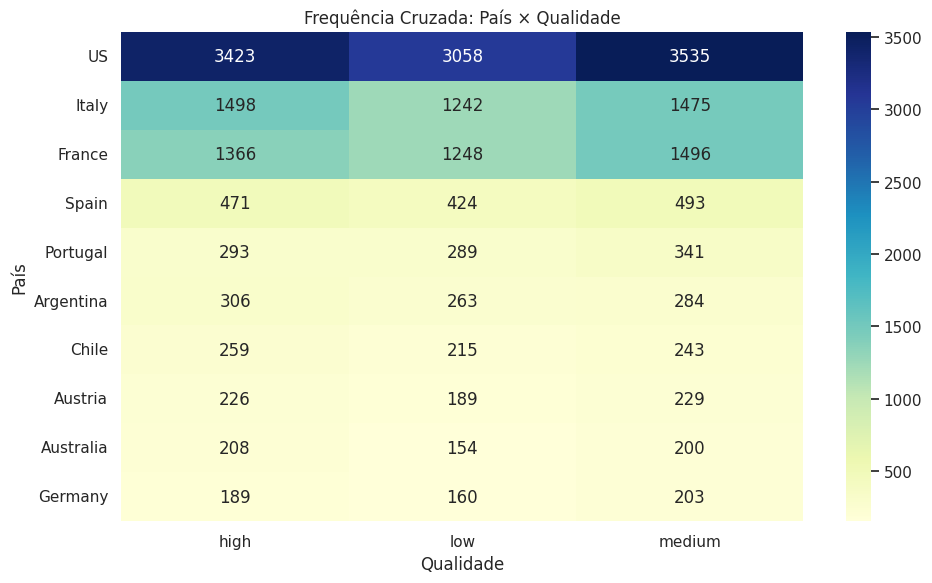

In [98]:
crosstab = pd.crosstab(df['country'], df['quality_label'])
top_crosstab = crosstab.loc[crosstab.sum(axis=1).nlargest(10).index]

plt.figure(figsize=(10, 6))
sns.heatmap(top_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Frequência Cruzada: País × Qualidade')
plt.xlabel('Qualidade')
plt.ylabel('País')
plt.tight_layout()
plt.show()

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">4. Pré Processamento de Dados:</p>

# Limpeza

> # Step 01: Missings

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

>> # Step 01.1: Missings - Identificação de Nulos

In [99]:
# Total e percentual de valores ausentes por coluna
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_frame = pd.DataFrame({
    'Missing Values': missing,
    '% do Total': missing_percent
}).sort_values(by='Missing Values', ascending=False)

print(missing_frame)

                Missing Values  % do Total
region_2                141520   93.764700
designation             133752   88.617978
region_1                130422   86.411672
price                   128743   85.299243
province                126654   83.915167
variety                 126652   83.913841
points                  126652   83.913841
winery                  126652   83.913841
country                 125932   83.436802
description             125930   83.435477
fixed_acidity           125930   83.435477
residual_sugar          125930   83.435477
alcohol                 125930   83.435477
density                 125930   83.435477
quality_label           125930   83.435477


<Axes: >

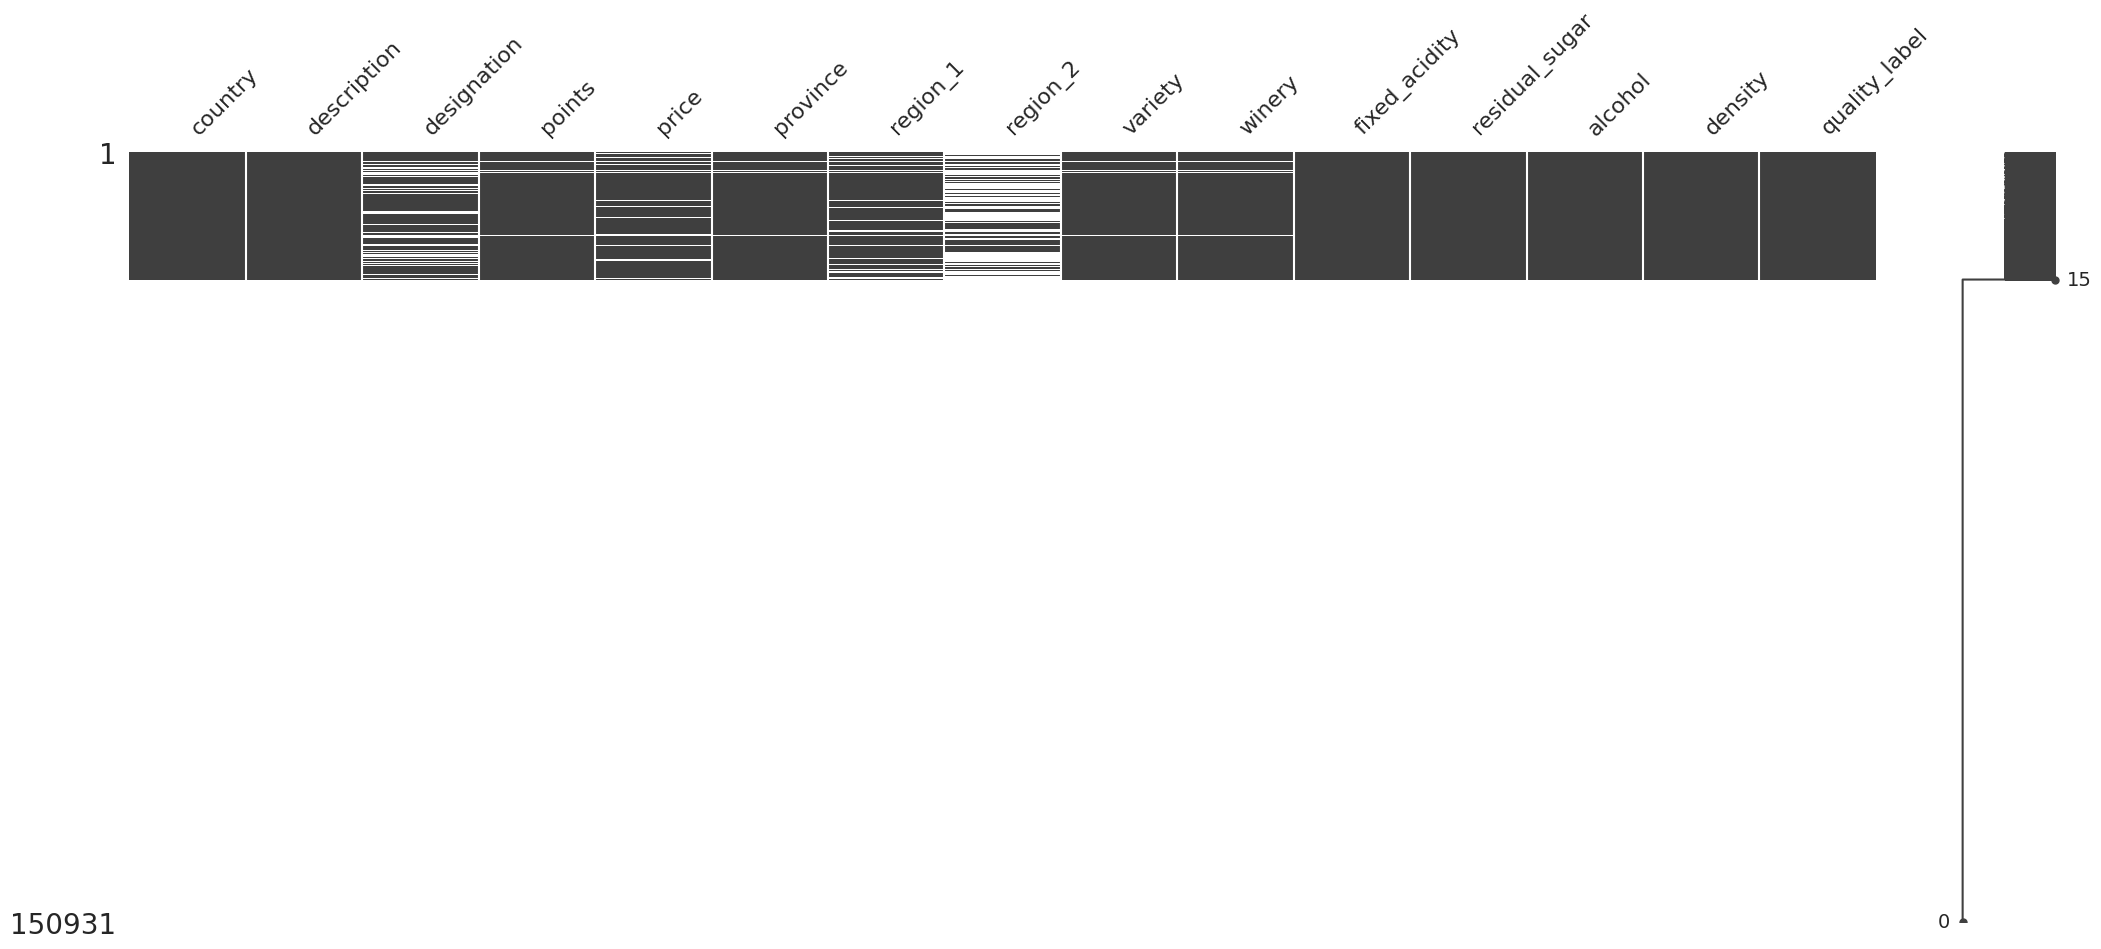

In [100]:
# recuperando os nomes das colunas
col = list(df.columns)

# o novo dataset irá conter todas as colunas do dataset original
missing_df = df[col[:]]

# substituindo os zeros por NaN
missing_df.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(missing_df)

>> # Step 01.2: Missings - Remoção de Linhas Nulas

In [101]:
# Conta antes
linhas_antes = missing_df.shape[0]

# Remove linhas 100% vazias
missing_df.dropna(how='all', inplace=True)

# Conta depois
linhas_depois = missing_df.shape[0]

# Exibe o resultado
print(f"Linhas antes: {linhas_antes}")
print(f"Linhas depois: {linhas_depois}")
print(f"Linhas removidas: {linhas_antes - linhas_depois}")

Linhas antes: 150931
Linhas depois: 25001
Linhas removidas: 125930


>> # Step 01.3: Missings - Identificação de Nulos

<Axes: >

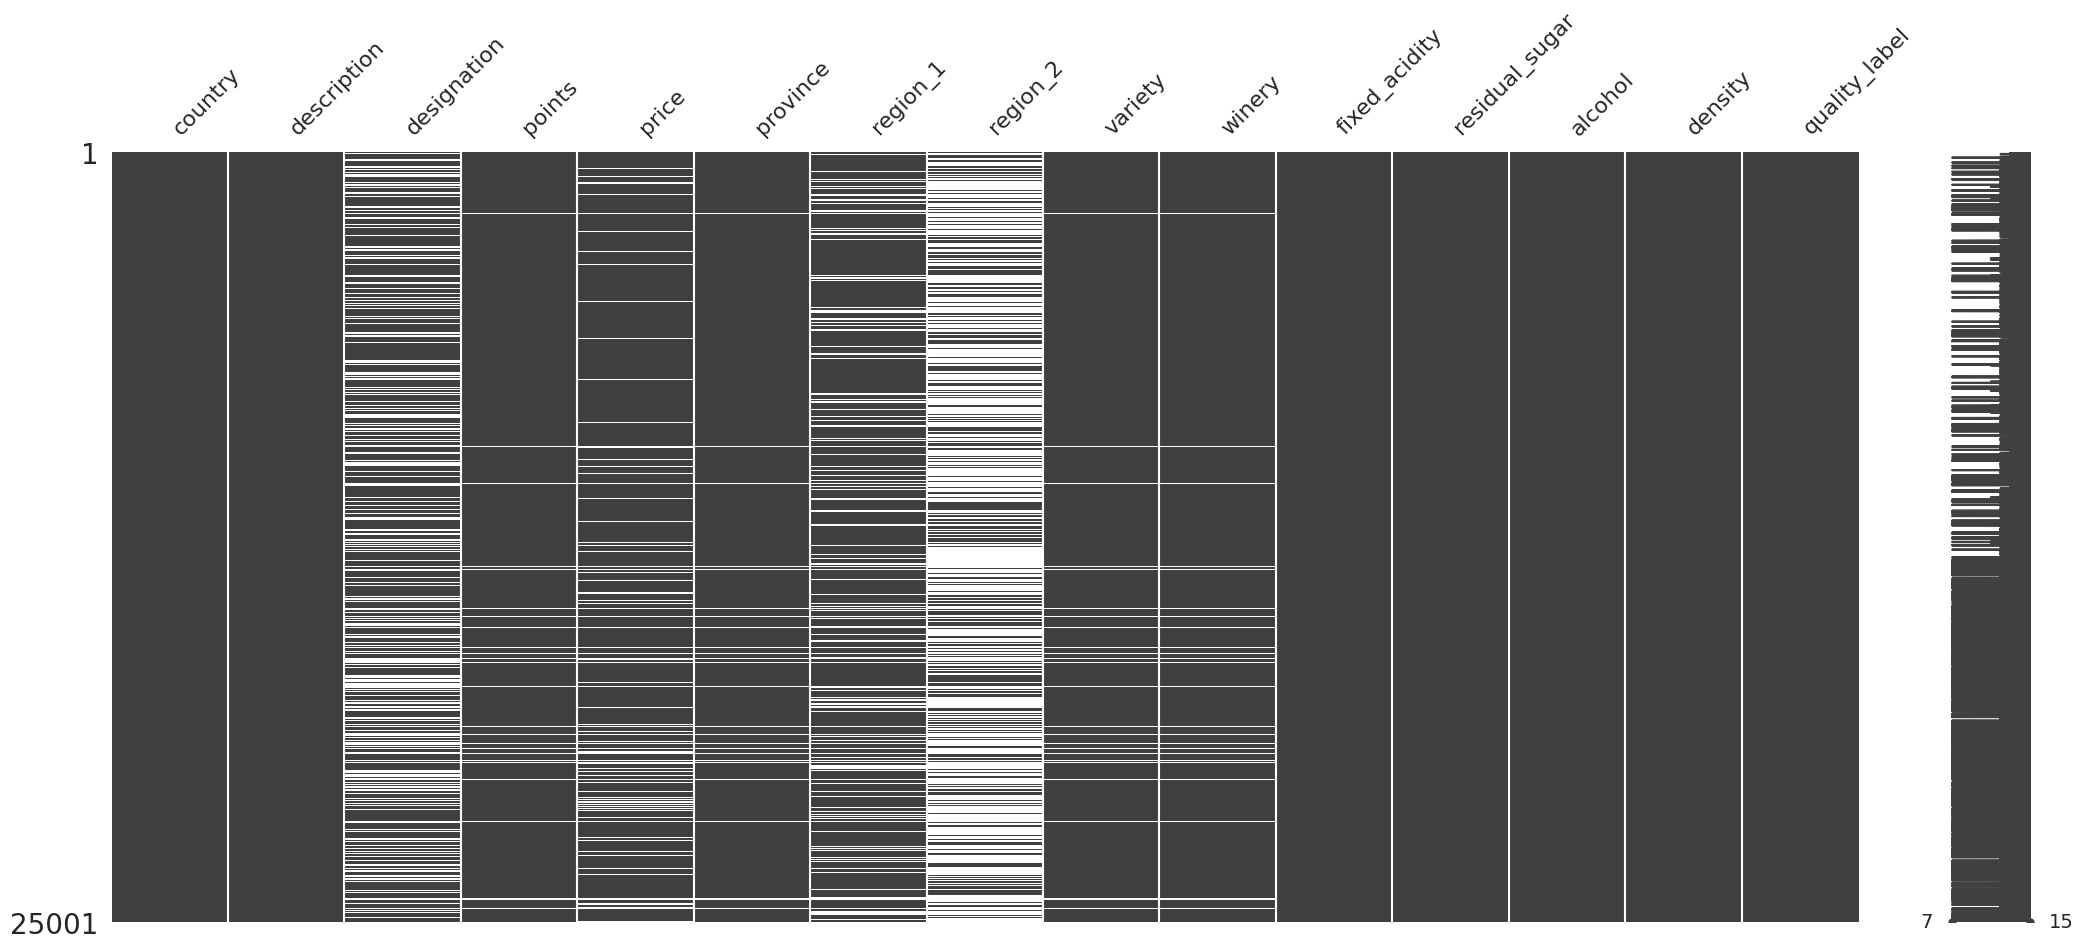

In [102]:
# recuperando os nomes das colunas
col = list(missing_df.columns)

# o novo dataset irá conter todas as colunas do dataset original
missing_df = missing_df[col[:]]

# substituindo os zeros por NaN
missing_df.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(missing_df)

In [103]:
# Total e percentual de valores ausentes por coluna
missing = missing_df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_frame = pd.DataFrame({
    'Missing Values': missing,
    '% do Total': missing_percent
}).sort_values(by='Missing Values', ascending=False)

print(missing_frame)

                Missing Values  % do Total
region_2                 15590   10.329223
designation               7822    5.182501
region_1                  4492    2.976194
price                     2813    1.863766
province                   724    0.479689
variety                    722    0.478364
points                     722    0.478364
winery                     722    0.478364
country                      2    0.001325
description                  0    0.000000
fixed_acidity                0    0.000000
residual_sugar               0    0.000000
alcohol                      0    0.000000
density                      0    0.000000
quality_label                0    0.000000


>> # Step 01.4: Missings - Preenchermento de Valores

In [104]:
#Categóricas

missing_df['designation'].fillna('Sem Designação', inplace=True)
missing_df['country'].fillna('Desconhecido', inplace=True)
missing_df['province'].fillna('Desconhecido', inplace=True)
missing_df['region_1'].fillna('Não Informada', inplace=True)
missing_df['region_2'].fillna('Não Informada', inplace=True)
missing_df['variety'].fillna('Outra', inplace=True)
missing_df['winery'].fillna('Desconhecida', inplace=True)

# Numéricas
missing_df['points'].fillna(missing_df['points'].median(), inplace=True)
missing_df['price'].fillna(30, inplace=True)

>> # Step 01.5: Missings - Identificação de Nulos

<Axes: >

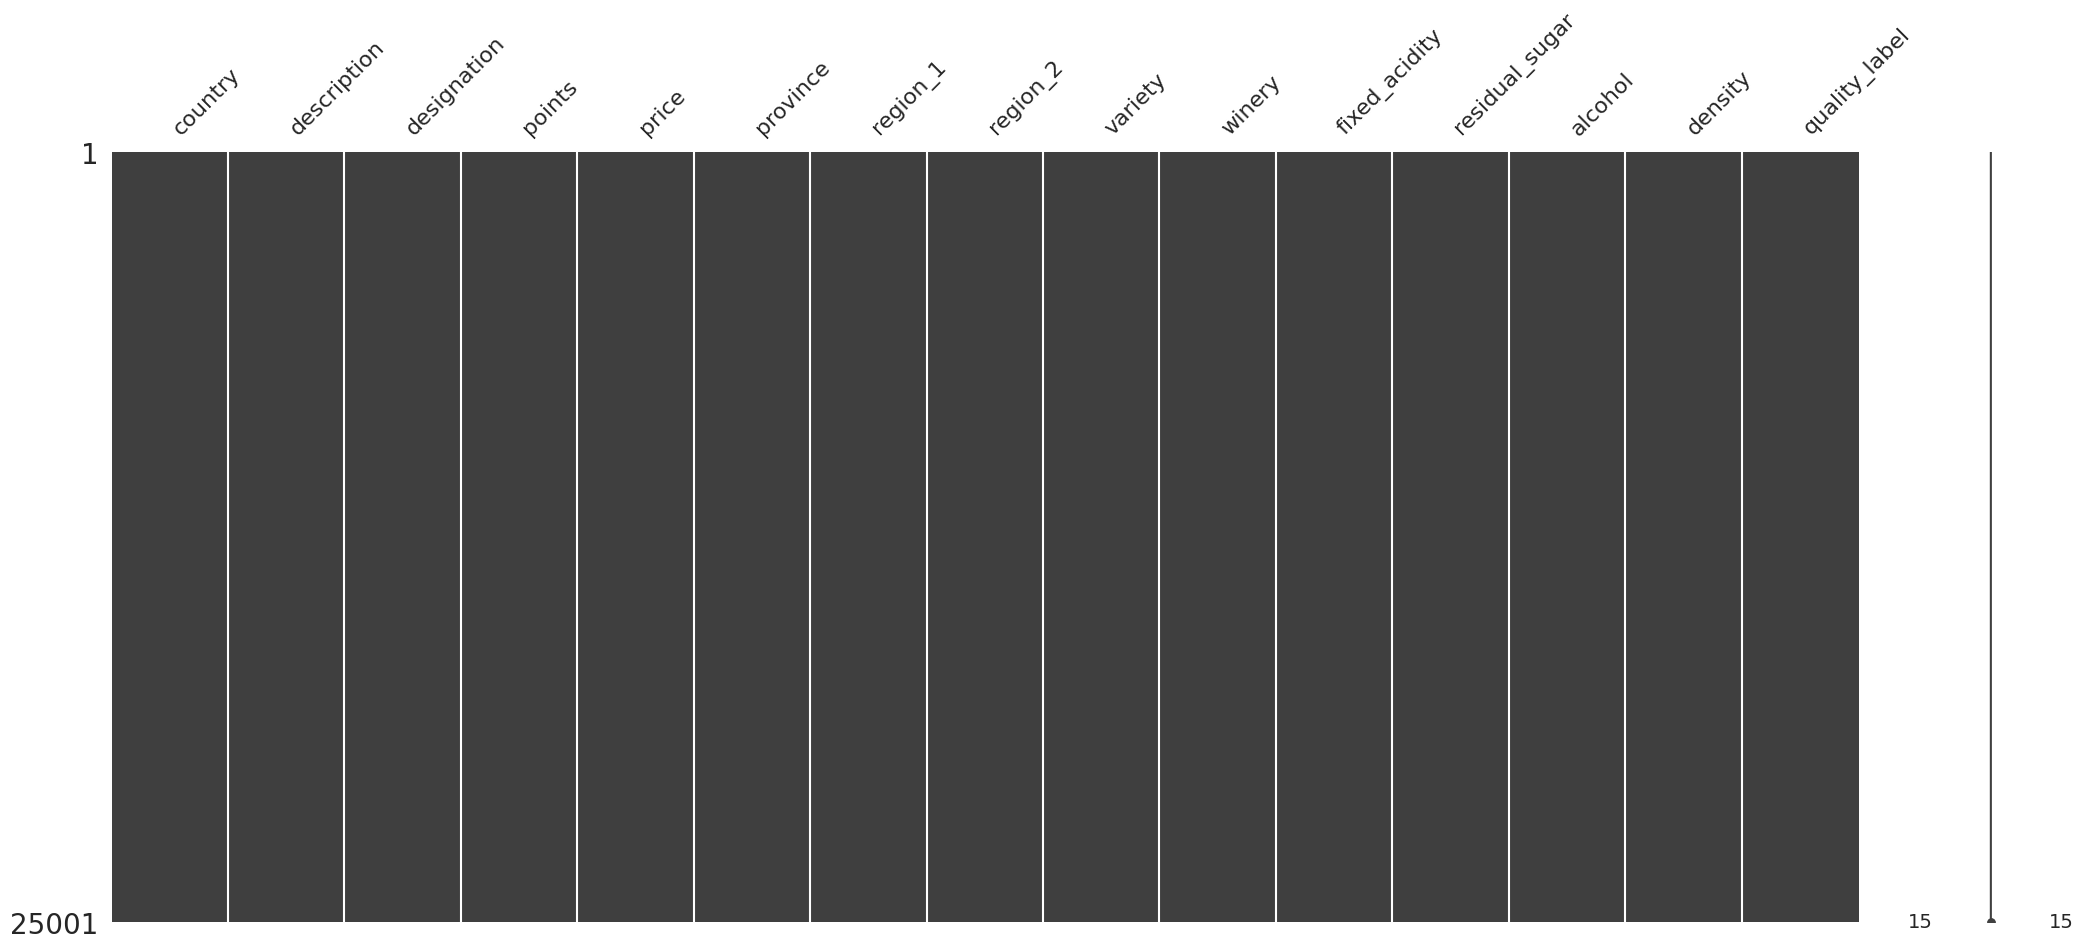

In [105]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(missing_df)

In [106]:

# Total e percentual de valores ausentes por coluna
missing = missing_df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_frame = pd.DataFrame({
    'Missing Values': missing,
    '% do Total': missing_percent
}).sort_values(by='Missing Values', ascending=False)

print(missing_frame)

                Missing Values  % do Total
country                      0         0.0
description                  0         0.0
designation                  0         0.0
points                       0         0.0
price                        0         0.0
province                     0         0.0
region_1                     0         0.0
region_2                     0         0.0
variety                      0         0.0
winery                       0         0.0
fixed_acidity                0         0.0
residual_sugar               0         0.0
alcohol                      0         0.0
density                      0         0.0
quality_label                0         0.0


>> # Step 01.6: Missings - Atribuição do Dataset

In [107]:
df = missing_df.copy()

> # Step 02: Redundancias

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.


In [108]:
#Tratamento de valores ausentes:

## Remover duplicatas
df.drop_duplicates(inplace=True)


> # Step 03: Outliers

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

In [109]:
# Garante que 'density' é numérico (caso ainda queira usá-la depois)
df['density'] = pd.to_numeric(df['density'], errors='coerce')

# Lista de colunas numéricas para tratamento de outliers
numeric_cols = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol']

# Inicializa uma máscara booleana (começa com todos True)
mask = pd.Series(True, index=df.index)

# Para cada coluna, aplica a regra do IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask &= df[col].between(lower, upper)

# Aplica a máscara: mantém apenas as linhas válidas
df_sem_outliers = df[mask]

# Guarda os outliers descartados
outliers_df = df[~mask]

# Exibe exemplos de outliers removidos
print("Exemplos de linhas removidas por outliers:")
outliers_df.head()

df = df_sem_outliers.copy()

Exemplos de linhas removidas por outliers:


In [110]:
print("="*50)
print("Amostra das 10 ultimas linhas do DataFrame")
print("="*50)
outliers_df.tail(10)

Amostra das 10 ultimas linhas do DataFrame


,country,description,designation,points,price,province,region_1,region_2,variety,winery,fixed_acidity,residual_sugar,alcohol,density,quality_label
24486,US,Swanson employs former winemaker Marco Cappell...,Angelica,90.0,1400.0,California,Amador County,Sierra Foothills,Mission,Swanson,14.6,1.4,13.1,0.9949,medium
24497,US,"This is a rich, elaborate Cabernet Sauvignon I...",The Cornerstone,90.0,1250.0,California,Napa Valley,Napa,Cabernet Sauvignon,Cornerstone,13.3,1.7,10.3,0.9968,high
24543,France,"Dark in color, with an initial note of extract...",Sem Designação,91.0,800.0,Bordeaux,Saint-Émilion,Não Informada,Bordeaux-style Red Blend,Château Fonplégade,10.4,9.9,8.3,0.9939,medium
24587,Italy,Made with organically-framed fruit The bouquet...,Suisassi,91.0,1200.0,Tuscany,Toscana,Não Informada,Syrah,Duemani,5.9,7.6,13.9,0.9945,medium
24637,France,From a parcel at the highest point of the Trac...,101 Rangs,91.0,1400.0,Loire Valley,Pouilly-Fumé,Não Informada,Sauvignon Blanc,Château de Tracy,12.9,12.9,13.7,10045.0000,low
24652,US,"Ripe, forward blackberry, cherry, currant and ...",Tribute,90.0,800.0,California,Sonoma Mountain,Sonoma,Bordeaux-style Red Blend,Benziger,10.1,1.2,8.8,10036.0000,low
24751,Italy,This 60-40 super Tuscan blend of Sangiovese an...,Salicaria,90.0,800.0,Tuscany,Toscana,Não Informada,Red Blend,Fattoria di Grignano,6.2,8.6,12.5,0.9995,low
24752,Italy,Duemani is known for its high quality organic ...,Sem Designação,90.0,900.0,Tuscany,Toscana,Não Informada,Cabernet Franc,Duemani,11.0,6.9,12.0,0.9940,medium
24757,Portugal,"A wine only made in the best years, this is ri...",Escultor,90.0,890.0,Alentejano,Não Informada,Não Informada,Portuguese Red,Monte do Pintor,12.2,14.6,9.7,0.9973,low
24810,Portugal,Both the high alcohol and the heavy bottle det...,Grande Rocim Reserva,90.0,900.0,Alentejano,Não Informada,Não Informada,Portuguese Red,Herdade do Rocim,5.7,6.3,13.2,0.9965,medium


# Preparação e Transformação de dados

> # Step 01: Novas Caracteristicas

In [111]:
#novas características

def faixa_preco(preco):
    if preco == 0:
        return 'Sem Preço'
    elif preco > 0 and preco <= 30:
        return 'baixo'
    elif preco <= 60:
        return 'médio'
    else:
        return 'alto'

df['price_range'] = df['price'].apply(faixa_preco)
df['qpr'] = df['points'] / df['price']
df['full_region'] = df['province'] + ' - ' + df['region_1']
df['alcohol_density_ratio'] = df['alcohol'] / df['density']


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22891 entries, 25 to 25000
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                22891 non-null  object 
 1   description            22891 non-null  object 
 2   designation            22891 non-null  object 
 3   points                 22891 non-null  float64
 4   price                  22891 non-null  float64
 5   province               22891 non-null  object 
 6   region_1               22891 non-null  object 
 7   region_2               22891 non-null  object 
 8   variety                22891 non-null  object 
 9   winery                 22891 non-null  object 
 10  fixed_acidity          22891 non-null  float64
 11  residual_sugar         22891 non-null  float64
 12  alcohol                22891 non-null  float64
 13  density                22891 non-null  float64
 14  quality_label          22891 non-null  object 
 15  price_

# Step 02: Redução de Dimensionalidade

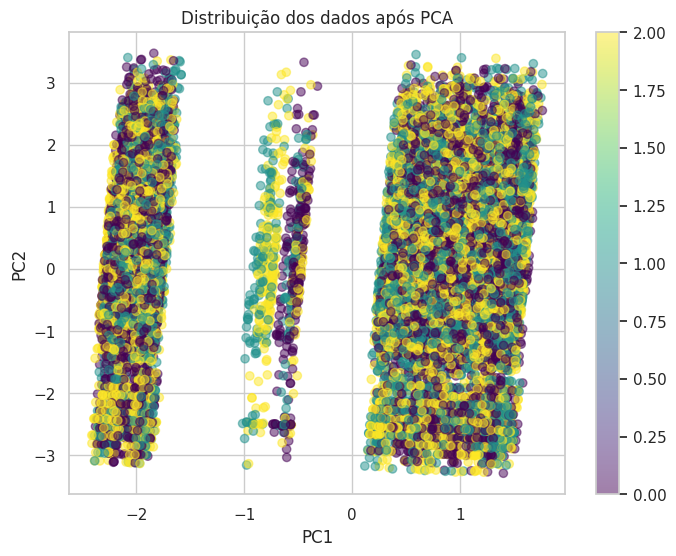

In [112]:
#codigo aqui

# Seleciona apenas colunas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Selecionar apenas colunas numéricas válidas
X_numeric = df[numeric_cols].copy()


# Normalizar os dados antes do PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


# Aplicar PCA para reduzir para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Substituir as features originais pelas componentes principais
X = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


plt.figure(figsize=(8,6))
plt.scatter(X['PC1'], X['PC2'], c=pd.Categorical(df['quality_label']).codes, cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Distribuição dos dados após PCA')
plt.colorbar()
plt.show()

> # Step 04: Categorização de Variáveis

In [113]:
# Conversão de colunas categóricas em códigos numéricos para visualização ou modelagem
for col in ['country', 'designation', 'province', 'region_1', 'region_2',
            'variety', 'winery', 'price_range', 'quality_label', 'full_region']:
    df[f'{col}_code'] = LabelEncoder().fit_transform(df[col])



In [114]:
    df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,...,country_code,designation_code,province_code,region_1_code,region_2_code,variety_code,winery_code,price_range_code,quality_label_code,full_region_code
25,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94.0,570.0,Kumeu,Não Informada,Não Informada,Chardonnay,Kumeu River,...,25,5586,120,488,11,77,4109,0,0,448
26,US,Bergström has made a Shea designate since 2003...,Shea Vineyard,94.0,620.0,Oregon,Willamette Valley,Não Informada,Pinot Noir,Bergström,...,34,7904,183,804,11,277,540,0,0,647
28,US,"Cranberry, baked rhubarb, anise and crushed sl...",Garys' Vineyard,94.0,600.0,California,Santa Lucia Highlands,Central Coast,Pinot Noir,Roar,...,34,3483,38,634,1,277,5806,0,2,259
29,US,This standout Rocks District wine brings earth...,The Funk Estate,94.0,600.0,Washington,Walla Walla Valley (WA),Columbia Valley,Syrah,Saviah,...,34,8646,284,801,3,359,6023,0,1,1044
30,Bulgaria,This Bulgarian Mavrud presents the nose with s...,Bergulé,90.0,150.0,Bulgaria,Não Informada,Não Informada,Mavrud,Villa Melnik,...,6,770,33,488,11,202,6971,0,1,85


> # Step 05: Normalização

In [115]:
df.dtypes

,0
country,object
description,object
designation,object
points,float64
price,float64
province,object
region_1,object
region_2,object
variety,object
winery,object


In [128]:
# 1. Seleciona colunas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# 2. Normaliza os dados numéricos
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[numeric_cols])

# 3. Cria DataFrame com dados normalizados (mantém o mesmo índice)
df_normalizado = pd.DataFrame(normalized_data, columns=[col  for col in numeric_cols], index=df.index)

# 4. Junta os dados normalizados com o DataFrame original
df_final = pd.concat([df, df_normalizado], axis=1)

# 5. Exibe resultado
print(df_final.head())


        country                                        description  \
25  New Zealand  Yields were down in 2015, but intensity is up,...   
26           US  Bergström has made a Shea designate since 2003...   
28           US  Cranberry, baked rhubarb, anise and crushed sl...   
29           US  This standout Rocks District wine brings earth...   
30     Bulgaria  This Bulgarian Mavrud presents the nose with s...   

        designation  points  price    province                 region_1  \
25  Maté's Vineyard    94.0  570.0       Kumeu            Não Informada   
26    Shea Vineyard    94.0  620.0      Oregon        Willamette Valley   
28  Garys' Vineyard    94.0  600.0  California    Santa Lucia Highlands   
29  The Funk Estate    94.0  600.0  Washington  Walla Walla Valley (WA)   
30          Bergulé    90.0  150.0    Bulgaria            Não Informada   

           region_2     variety        winery  ...  country_code  \
25    Não Informada  Chardonnay   Kumeu River  ...      0.69

In [129]:
df_final.dtypes

,0
country,object
description,object
designation,object
points,float64
price,float64
province,object
region_1,object
region_2,object
variety,object
winery,object


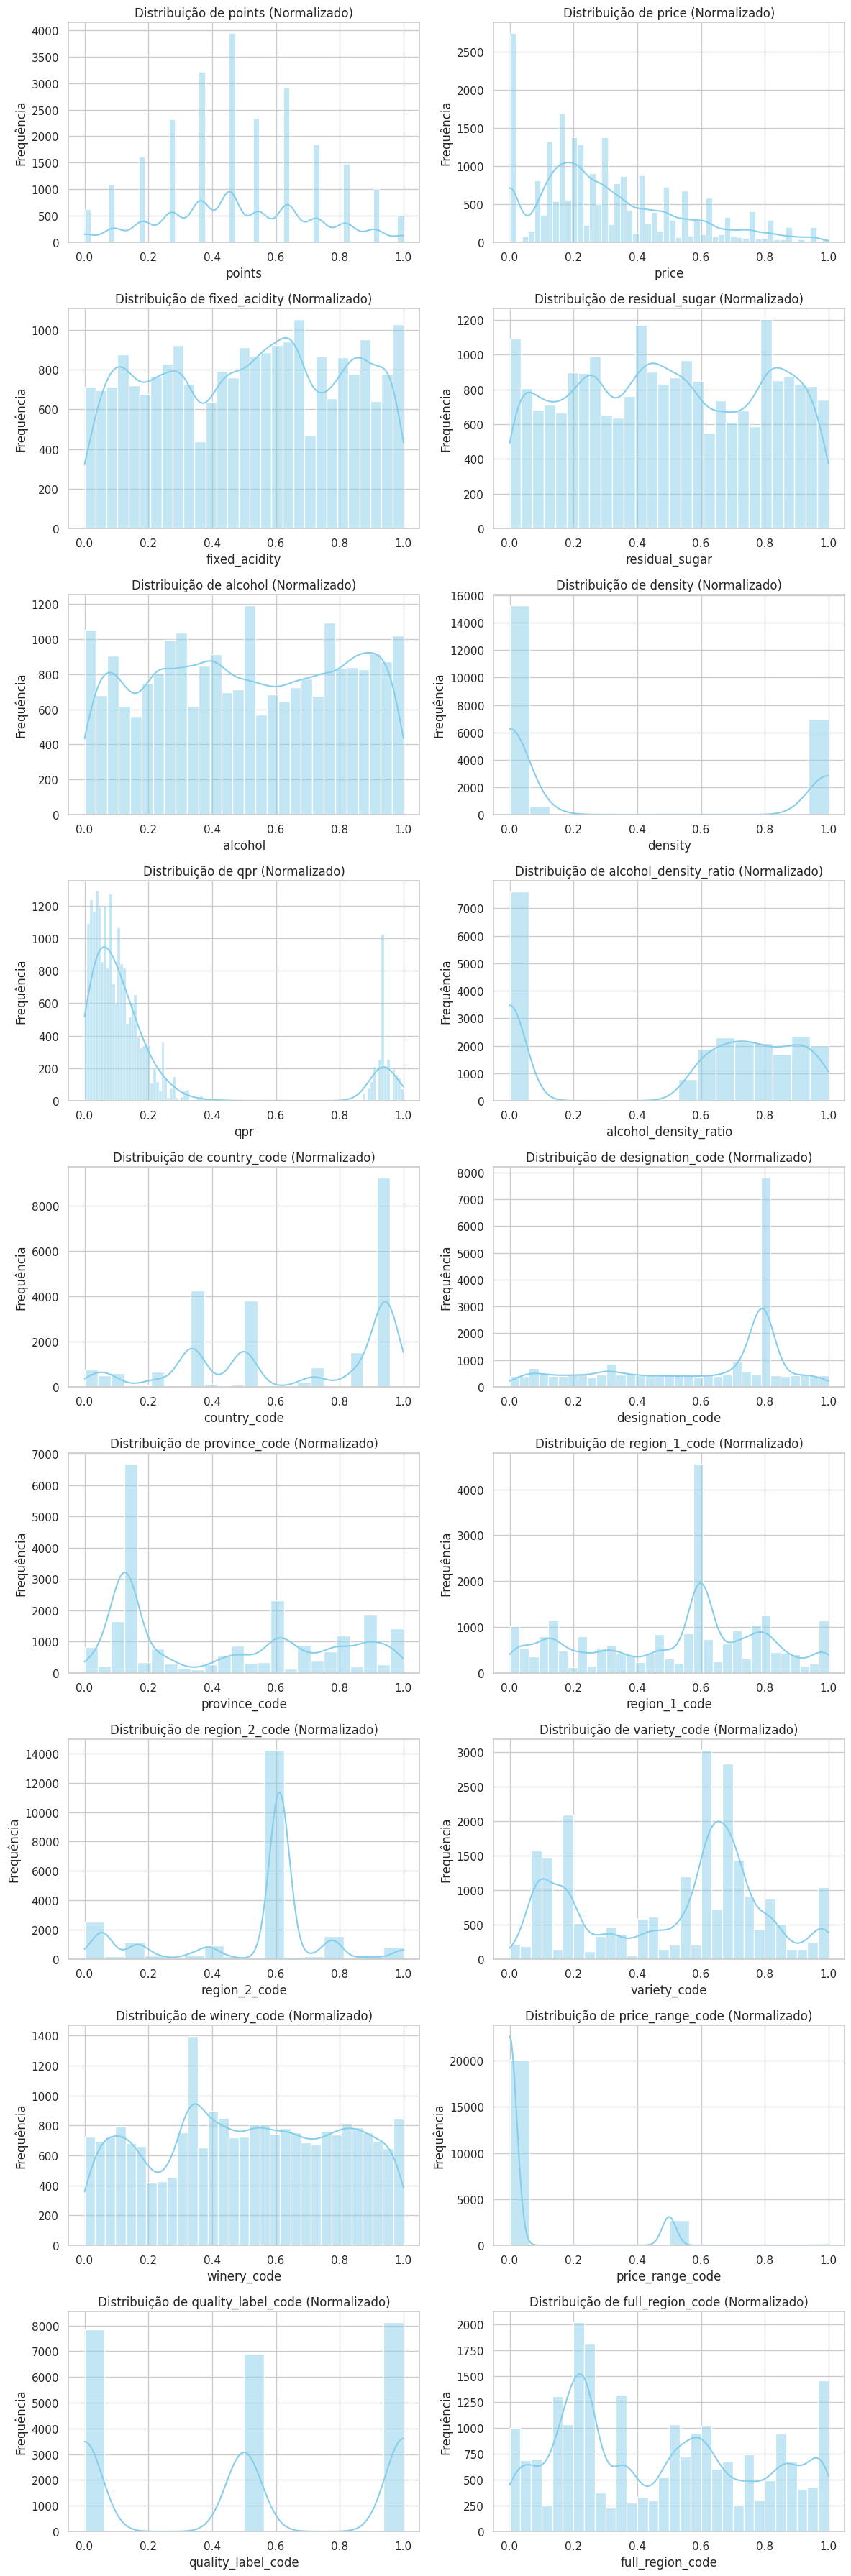

In [130]:
# Visualização da distribuição após a normalização
cols = df_normalizado.columns
n_cols = 2
n_rows = int(np.ceil(len(cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(df_normalizado[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribuição de {col} (Normalizado)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Remove eixos extras, caso existam
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Step 07: Divisão do Conjunto de Dados

In [131]:
# Define X (variáveis independentes)
X = df_final.drop(columns=['quality_label'])

# Define y (variável alvo)
y = df_final['quality_label']

# Divide em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Exibe as dimensões
print(f"Dimensões de X Treino: {X_train.shape}")
print(f"Dimensões de X Teste: {X_test.shape}")
print(f"Dimensões de y Treino: {y_train.shape}")



Dimensões de X Treino: (18312, 46)
Dimensões de X Teste: (4579, 46)
Dimensões de y Treino: (18312,)


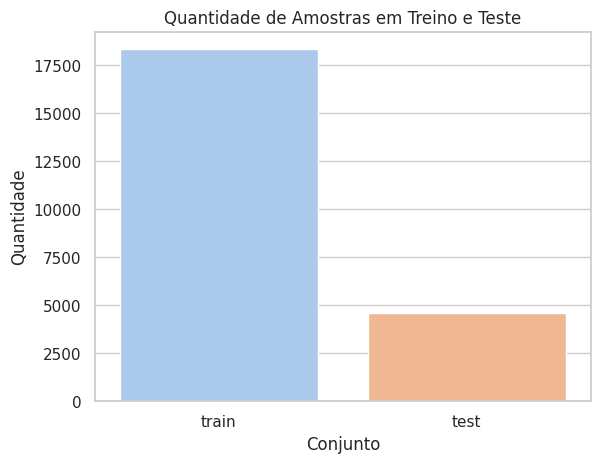

In [132]:

# Cria DataFrame de treino com coluna indicando o conjunto
df_train = X_train.copy()
df_train['dataset_type'] = 'train'

# Cria DataFrame de teste com coluna indicando o conjunto
df_test = X_test.copy()
df_test['dataset_type'] = 'test'

# Junta os dois
df_combined = pd.concat([df_train, df_test])

# Plot da contagem de registros por conjunto
sns.countplot(data=df_combined, x='dataset_type', palette='pastel')
plt.title('Quantidade de Amostras em Treino e Teste')
plt.xlabel('Conjunto')
plt.ylabel('Quantidade')
plt.show()

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">8. Conclusão</p>

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.